In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()
import seaborn as sns


In [ ]:
#Download data set

df = pd.read_csv("application_train.csv")

In [219]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
df.size

37516342

In [221]:
df.shape

(307511, 122)

In [222]:
df.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

Data Cleaning

In [223]:
# Calculate the percentage of NaN values in each column
nan_precentages = df.isna().mean() *100

# set a threshold for dropping columns ( 50% missing value)
threshold = 50


# Drop columns with >50% NAN values
columns_to_drop = nan_precentages[nan_precentages> threshold].index


for col in columns_to_drop:
    print(col)

print(len(columns_to_drop))

OWN_CAR_AGE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
41


In [224]:
df_train_dropped  = df.drop(columns=columns_to_drop)

In [225]:
df_train_dropped.shape

(307511, 81)

In [226]:
#Check data types

print(df_train_dropped.dtypes.value_counts())

int64      41
float64    27
object     13
Name: count, dtype: int64


In [227]:
# Check for missing values

missing_value = df_train_dropped.isnull().sum()

missing_value = missing_value[missing_value > 0].sort_index(ascending=False)

missing_percent = missing_value / len(df_train_dropped) *100

threshold = 30

columns_to_drop2 = missing_percent[missing_percent > threshold].index

print(len(columns_to_drop))

41


In [228]:
# Drop columns with >50% missing values
df_cleaned = df_train_dropped.drop(columns=columns_to_drop2)

print(df_cleaned.shape)

(307511, 72)


In [229]:
print(df_cleaned.dtypes.value_counts())

int64      41
float64    20
object     11
Name: count, dtype: int64


TARGET
0    282686
1     24825
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

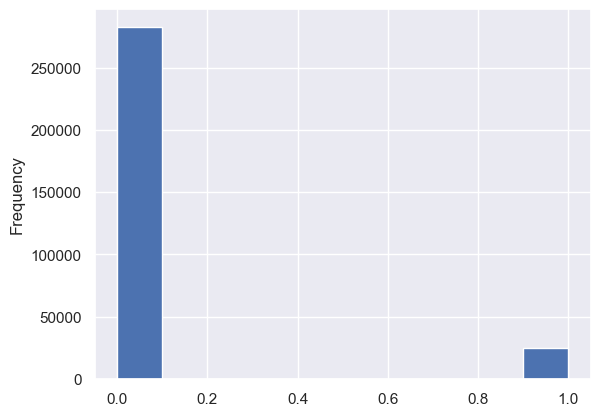

In [230]:
print(df_cleaned["TARGET"].value_counts())
df_cleaned["TARGET"].astype(int).plot.hist()

Correlation matrix

In [231]:
# Compute the correlation matrix using only numeric columns

numerical = df_cleaned.corr(numeric_only=True)


target_corr = numerical["TARGET"]

target_corr_abs = target_corr.abs()

target_corr_abs = target_corr_abs.drop("TARGET")

best_correlation = target_corr_abs.sort_values(ascending=False)

print(best_correlation)


EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
REGION_POPULATION_RELATIVE     0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
AMT_CREDIT                     0.030369
FLAG_DOCUMENT_6                0.028602
FLAG_WORK_PHONE                0.028524
HOUR_APPR_PROCESS_START        0.024166
FLAG_PHONE                     0.023806
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187


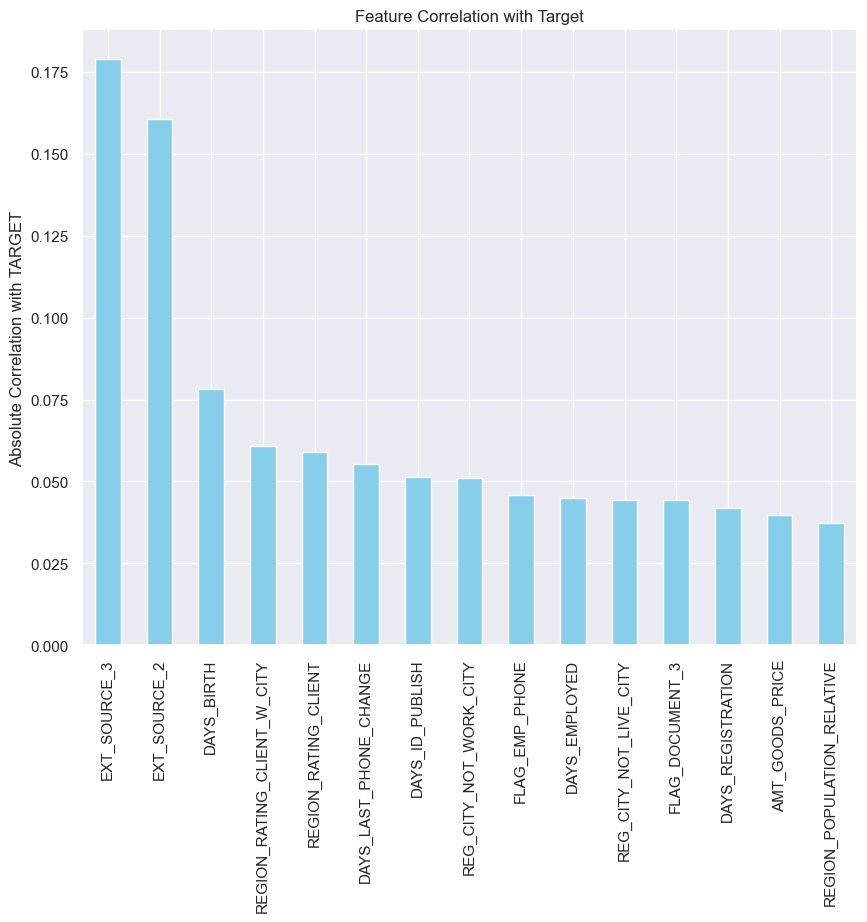

In [244]:
# Plot a bar chart showing the correlation strength of top features with the target
import matplotlib.pyplot as plt

best_correlation.head(15).plot(kind='bar', figsize=(10,8), color='skyblue',)
plt.ylabel('Absolute Correlation with TARGET')
plt.title('Feature Correlation with Target')
plt.show()


Anomoly handling

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


Text(0.5, 0, "Days Employment'")

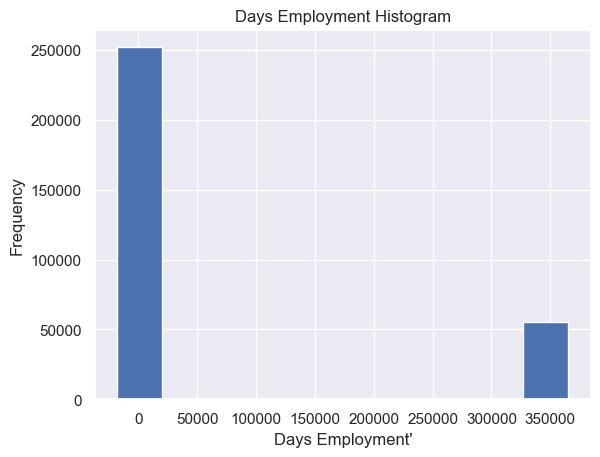

In [233]:
print(df_cleaned["DAYS_EMPLOYED"].describe())

df_cleaned["DAYS_EMPLOYED"].plot.hist(title='Days Employment Histogram')
plt.xlabel("Days Employment'") 


Text(0.5, 0, 'Days Employment')

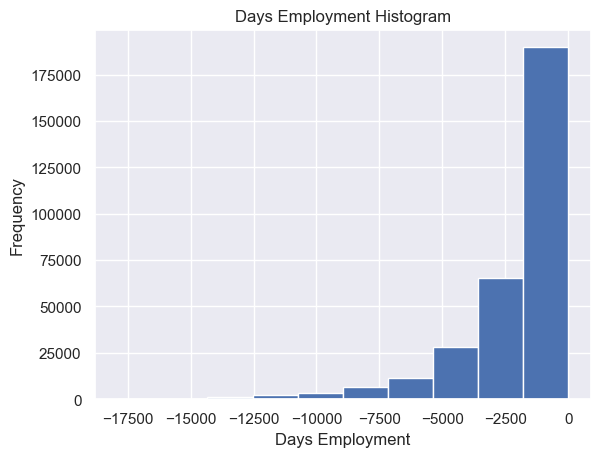

In [234]:
# Replace placeholder with NaN, add flag for employment, fill missing with 0

df_cleaned['DAYS_EMPLOYED'] = df_cleaned['DAYS_EMPLOYED'].replace(365243, np.nan)

df_cleaned["IS_EMPLOYED"]  =  df_cleaned["DAYS_EMPLOYED"].notna().astype(int)

df_cleaned["DAYS_EMPLOYED"] =  df_cleaned["DAYS_EMPLOYED"].fillna(0)


df_cleaned['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [235]:
x = df_cleaned.drop(columns="TARGET")
y = df_cleaned["TARGET"]

In [236]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state=42 , stratify=y)


In [237]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(246008, 72)
(61503, 72)
(246008,)
(61503,)
